In [2]:
#loading the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import ExtraTreesClassifier

%matplotlib inline

In [3]:
#loading the requisite files

churn_df = pd.read_csv('trunc_churn.csv')
members_df = pd.read_csv('trunc_members.csv')
transact_df = pd.read_csv('trunc_transaction.csv')
users_df = pd.read_csv('trunc_users.csv')
member_churn_df = pd.read_csv('member_churn_df.csv').drop(['Unnamed: 0'], axis = 1)
members_transaction_df = pd.read_csv('members_transaction_df.csv').drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.,
        4000.]), <a list of 10 Text xticklabel objects>)

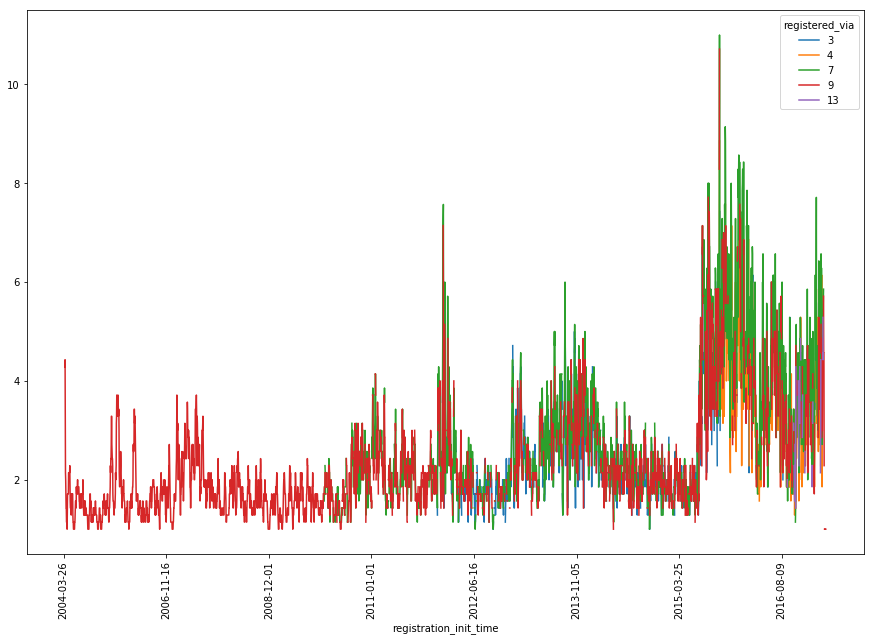

In [4]:
# Unstacked chart of registration method

member_churn_df.groupby(['registration_init_time','registered_via']).count().rolling(7)['is_churn'].mean().unstack().plot(figsize=(15,10))
plt.xticks(rotation=90)

In [11]:
### Query1. (is_cancel==1) & (is_churn==0)
### 'is_auto_renew' == 1 only. Need to manually cancel?
### These are still with KKBox. Signed up for lower promotional price

members_transaction_df.query('(is_cancel==1) & (is_churn==0)').head(5)

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,is_churn,city,bd,gender,registered_via,registration_init_time
3,/PhaKznHrHOIGcb+hrYFfjjHeyLelfWejGDbbaGpruQ=,41,30,99,99,1,2017-03-05,2017-03-05,1,0,13,30,female,7,2010-08-18
13,6TnvGVKwjgMI6o+jn5wBCuMTn4Y8UxvI03K+2EQ4zBM=,41,30,149,149,1,2017-03-30,2017-03-30,1,0,1,0,NaN,7,2011-07-21
196,WAMleIuG124oDSSdhcZIECwLcHHHbk4or0y6gxkK7t8=,41,30,149,149,1,2015-12-12,2022-01-18,1,0,15,34,male,7,2010-12-24
223,ZZZHSpkxY613Z/UhUf1YL+r2d9iXw41DLmI1ypTCb1M=,36,30,180,180,1,2017-03-10,2017-03-09,1,0,4,37,male,9,2011-02-27
307,yiJoh+g0PMrSaAuM0eOmUi8gQFu2zVM0/qg8w+qgY5I=,41,30,149,149,1,2017-03-27,2017-03-27,1,0,1,0,NaN,7,2013-08-17


In [6]:
### Member info1a 'is_cancel == 1' and 'is_churn == 0' 
### 'is_auto_renew == 1'
##?? are they still with KKBox?  what were they cancelling from before 3/05?

members_transaction_df[members_transaction_df['msno'] == '/PhaKznHrHOIGcb+hrYFfjjHeyLelfWejGDbbaGpruQ='].sort_values('transaction_date')

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,is_churn,city,bd,gender,registered_via,registration_init_time
2,/PhaKznHrHOIGcb+hrYFfjjHeyLelfWejGDbbaGpruQ=,41,30,99,99,1,2017-03-05,2017-04-04,0,0,13,30,female,7,2010-08-18
3,/PhaKznHrHOIGcb+hrYFfjjHeyLelfWejGDbbaGpruQ=,41,30,99,99,1,2017-03-05,2017-03-05,1,0,13,30,female,7,2010-08-18


In [8]:
### Member info1b. 
### 'is_cancel == 1' and 'is_churn == 0' 
### 'is_auto_renew == 1'

members_transaction_df[members_transaction_df['msno'] == '6TnvGVKwjgMI6o+jn5wBCuMTn4Y8UxvI03K+2EQ4zBM='].sort_values('transaction_date')

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,is_churn,city,bd,gender,registered_via,registration_init_time
15,6TnvGVKwjgMI6o+jn5wBCuMTn4Y8UxvI03K+2EQ4zBM=,41,30,149,149,1,2017-03-02,2017-04-02,0,0,1,0,NaN,7,2011-07-21
13,6TnvGVKwjgMI6o+jn5wBCuMTn4Y8UxvI03K+2EQ4zBM=,41,30,149,149,1,2017-03-30,2017-03-30,1,0,1,0,NaN,7,2011-07-21
14,6TnvGVKwjgMI6o+jn5wBCuMTn4Y8UxvI03K+2EQ4zBM=,41,30,99,99,1,2017-03-30,2017-04-30,0,0,1,0,NaN,7,2011-07-21


In [12]:
### Member info1c. 
### 'is_cancel == 1' and 'is_churn == 0' 
### 'is_auto_renew == 1'

members_transaction_df[members_transaction_df['msno'] == 'WAMleIuG124oDSSdhcZIECwLcHHHbk4or0y6gxkK7t8='].sort_values('transaction_date').head(5)

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,is_churn,city,bd,gender,registered_via,registration_init_time
155,WAMleIuG124oDSSdhcZIECwLcHHHbk4or0y6gxkK7t8=,41,30,149,119,1,2015-01-10,2018-06-02,0,0,15,34,male,7,2010-12-24
181,WAMleIuG124oDSSdhcZIECwLcHHHbk4or0y6gxkK7t8=,41,30,149,149,1,2015-01-21,2018-07-03,0,0,15,34,male,7,2010-12-24
177,WAMleIuG124oDSSdhcZIECwLcHHHbk4or0y6gxkK7t8=,41,30,149,149,1,2015-01-22,2018-08-03,0,0,15,34,male,7,2010-12-24
157,WAMleIuG124oDSSdhcZIECwLcHHHbk4or0y6gxkK7t8=,41,30,149,149,1,2015-01-25,2018-09-03,0,0,15,34,male,7,2010-12-24
188,WAMleIuG124oDSSdhcZIECwLcHHHbk4or0y6gxkK7t8=,41,30,149,119,1,2015-02-10,2018-10-01,0,0,15,34,male,7,2010-12-24


In [13]:
### Member info1d. 
### 'is_cancel == 1' and 'is_churn == 0' 
### 'is_auto_renew == 1'

members_transaction_df[members_transaction_df['msno'] == 'yiJoh+g0PMrSaAuM0eOmUi8gQFu2zVM0/qg8w+qgY5I='].sort_values('transaction_date')

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,is_churn,city,bd,gender,registered_via,registration_init_time
306,yiJoh+g0PMrSaAuM0eOmUi8gQFu2zVM0/qg8w+qgY5I=,41,30,149,149,1,2017-03-16,2017-04-16,0,0,1,0,NaN,7,2013-08-17
307,yiJoh+g0PMrSaAuM0eOmUi8gQFu2zVM0/qg8w+qgY5I=,41,30,149,149,1,2017-03-27,2017-03-27,1,0,1,0,NaN,7,2013-08-17


In [14]:
### Query2. 'is_cancel == 0' and 'is_churn == 1'.  
### 'is_auto-renew' both 1 and 0.  How do you not cancel if you don't have auto-renewal
members_transaction_df.query('(is_auto_renew==1) & (is_cancel==0) & (is_churn==1)').head(5)

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,is_churn,city,bd,gender,registered_via,registration_init_time
64,ErZy+VzG7Uvdo0I1neCV71kv5t/l3JL1upf/KYhEGdk=,41,30,129,129,1,2017-03-11,2017-04-12,0,1,1,0,NaN,7,2010-05-12
75,Jht0FZJFKv4BLQG0AHYvpM5mB410bELiT+cx6ko/Vmw=,41,30,99,99,1,2017-03-25,2017-04-25,0,1,1,0,NaN,7,2016-03-26
77,NAtPoQy6OeUC8JYGXRGr6vrIyHgNT8zysY2kSae9Pu8=,41,30,149,149,1,2015-04-17,2017-07-17,0,1,13,38,male,7,2012-04-17
78,NAtPoQy6OeUC8JYGXRGr6vrIyHgNT8zysY2kSae9Pu8=,41,30,149,149,1,2015-12-17,2018-10-19,0,1,13,38,male,7,2012-04-17
79,NAtPoQy6OeUC8JYGXRGr6vrIyHgNT8zysY2kSae9Pu8=,41,30,149,149,1,2015-11-17,2018-08-19,0,1,13,38,male,7,2012-04-17


In [15]:
### Member info2a. 'is_cancel == 0 and 'is_churn == 1'
###?? 'is_auto_renew = 1'.  Why 'is_churn == 1' here, just signed up and have auto-renew so maybe credit card expired.  Didn't
### have to actively cancel?

members_transaction_df[members_transaction_df['msno'] == 'ErZy+VzG7Uvdo0I1neCV71kv5t/l3JL1upf/KYhEGdk='].sort_values('transaction_date')

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,is_churn,city,bd,gender,registered_via,registration_init_time
64,ErZy+VzG7Uvdo0I1neCV71kv5t/l3JL1upf/KYhEGdk=,41,30,129,129,1,2017-03-11,2017-04-12,0,1,1,0,NaN,7,2010-05-12


In [16]:
### Member info2b. 'is_cancel == 0 and 'is_churn == 1'
###?? 'is_auto_renew = 0'.  Don't understand why this guy is churn == 1 if manually renew before membership ends.  Because not auto-renew?

members_transaction_df[members_transaction_df['msno'] == '6N/i/URMvLh7IxNqW+oKJrCqfvmNbvPxMJQ92aaBcxA='].sort_values('transaction_date')

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,is_churn,city,bd,gender,registered_via,registration_init_time
10,6N/i/URMvLh7IxNqW+oKJrCqfvmNbvPxMJQ92aaBcxA=,38,30,149,149,0,2016-12-27,2017-04-16,0,1,12,34,male,4,2016-08-15
9,6N/i/URMvLh7IxNqW+oKJrCqfvmNbvPxMJQ92aaBcxA=,38,30,149,149,0,2017-03-04,2017-07-15,0,1,12,34,male,4,2016-08-15
11,6N/i/URMvLh7IxNqW+oKJrCqfvmNbvPxMJQ92aaBcxA=,38,30,149,149,0,2017-03-04,2017-05-16,0,1,12,34,male,4,2016-08-15
12,6N/i/URMvLh7IxNqW+oKJrCqfvmNbvPxMJQ92aaBcxA=,38,30,149,149,0,2017-03-04,2017-06-15,0,1,12,34,male,4,2016-08-15


In [17]:
### Query3 'is_cancel == 1' and 'is_churn == 1'.  
### 'is_auto_renew' == 1 only

members_transaction_df.query('(is_cancel==1) & (is_churn==1)')

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,is_churn,city,bd,gender,registered_via,registration_init_time
74,Jht0FZJFKv4BLQG0AHYvpM5mB410bELiT+cx6ko/Vmw=,41,30,99,99,1,2017-03-27,2017-03-28,1,1,1,0,NaN,7,2016-03-26
348,F27PyoM+JVIEfCmyCL1taKVzRBfPWVAXc3Q+jfn7g/4=,41,30,99,99,1,2017-03-28,2017-03-28,1,1,1,0,NaN,7,2016-02-27
434,UEMGkPjr9cCJkRdUXRLT5b6euO8TU4FFhOqluy/9rNk=,41,30,149,149,1,2015-04-11,2017-05-10,1,1,1,0,NaN,7,2013-03-15
495,j62MDzXhDXa76rqvVpE/Ulkv/hGzsJv9HtoQLF983Ws=,37,30,149,149,1,2017-03-06,2017-03-05,1,1,4,29,female,7,2012-11-14
530,vkgBCS/CyPtxCTT09wj7dSnSN5CTVnEO2csk2M5j9Zs=,41,30,99,99,1,2017-03-03,2017-03-04,1,1,1,0,NaN,7,2016-03-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20799,qbudAPSAGa8g1PyaVIdmt2IycvuMwpWvkNMFBWbXKXA=,37,30,149,149,1,2017-03-15,2017-03-14,1,1,13,33,male,9,2011-11-27
20893,3qPI4OLk6ykxXFAOdXi0uIS/PMhE5/L53Ngo9f5XL1s=,41,30,99,99,1,2017-03-13,2017-03-13,1,1,1,0,NaN,7,2015-07-17
20904,Du0VTD/c+jqoP1ZXTd1yoZPBorRQ/kCNGcuk6O1MAj4=,41,30,99,99,1,2017-03-07,2017-03-07,1,1,1,0,NaN,7,2016-02-16
20946,s5nfk90TcuqngxUXmwnrENVuID1bVnZ3AnPSn5Yi1BQ=,29,30,180,180,1,2017-03-22,2017-03-22,1,1,15,34,female,4,2016-02-23


In [18]:
### Member info3a. 'is_cancel == 1 and 'is_churn == 1'

members_transaction_df[members_transaction_df['msno'] == 'Jht0FZJFKv4BLQG0AHYvpM5mB410bELiT+cx6ko/Vmw='].sort_values('transaction_date')

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,is_churn,city,bd,gender,registered_via,registration_init_time
75,Jht0FZJFKv4BLQG0AHYvpM5mB410bELiT+cx6ko/Vmw=,41,30,99,99,1,2017-03-25,2017-04-25,0,1,1,0,NaN,7,2016-03-26
74,Jht0FZJFKv4BLQG0AHYvpM5mB410bELiT+cx6ko/Vmw=,41,30,99,99,1,2017-03-27,2017-03-28,1,1,1,0,NaN,7,2016-03-26


In [19]:
### Member info3b. 'is_cancel == 1 and 'is_churn == 1'

members_transaction_df[members_transaction_df['msno'] == 'F27PyoM+JVIEfCmyCL1taKVzRBfPWVAXc3Q+jfn7g/4='].sort_values('transaction_date')

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,is_churn,city,bd,gender,registered_via,registration_init_time
347,F27PyoM+JVIEfCmyCL1taKVzRBfPWVAXc3Q+jfn7g/4=,41,30,99,99,1,2017-03-26,2017-04-26,0,1,1,0,NaN,7,2016-02-27
348,F27PyoM+JVIEfCmyCL1taKVzRBfPWVAXc3Q+jfn7g/4=,41,30,99,99,1,2017-03-28,2017-03-28,1,1,1,0,NaN,7,2016-02-27


In [20]:
### Member info3c. 'is_cancel == 1 and 'is_churn == 1'
## ?? Again, I don't understand how this guy's churning since he continued the service, with auto-renewal

members_transaction_df[members_transaction_df['msno'] == 'UEMGkPjr9cCJkRdUXRLT5b6euO8TU4FFhOqluy/9rNk='].sort_values('transaction_date')

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,is_churn,city,bd,gender,registered_via,registration_init_time
433,UEMGkPjr9cCJkRdUXRLT5b6euO8TU4FFhOqluy/9rNk=,41,30,149,149,1,2015-03-14,2017-04-13,0,1,1,0,NaN,7,2013-03-15
442,UEMGkPjr9cCJkRdUXRLT5b6euO8TU4FFhOqluy/9rNk=,41,30,149,149,1,2015-03-14,2017-05-14,0,1,1,0,NaN,7,2013-03-15
434,UEMGkPjr9cCJkRdUXRLT5b6euO8TU4FFhOqluy/9rNk=,41,30,149,149,1,2015-04-11,2017-05-10,1,1,1,0,NaN,7,2013-03-15
439,UEMGkPjr9cCJkRdUXRLT5b6euO8TU4FFhOqluy/9rNk=,41,30,149,149,1,2015-04-14,2017-06-09,0,1,1,0,NaN,7,2013-03-15
440,UEMGkPjr9cCJkRdUXRLT5b6euO8TU4FFhOqluy/9rNk=,41,30,149,149,1,2015-05-14,2017-07-10,0,1,1,0,NaN,7,2013-03-15
438,UEMGkPjr9cCJkRdUXRLT5b6euO8TU4FFhOqluy/9rNk=,41,30,149,149,1,2015-06-14,2017-08-09,0,1,1,0,NaN,7,2013-03-15
441,UEMGkPjr9cCJkRdUXRLT5b6euO8TU4FFhOqluy/9rNk=,41,30,149,149,1,2015-07-14,2017-09-09,0,1,1,0,NaN,7,2013-03-15
437,UEMGkPjr9cCJkRdUXRLT5b6euO8TU4FFhOqluy/9rNk=,41,30,149,149,1,2015-08-14,2017-10-10,0,1,1,0,NaN,7,2013-03-15
443,UEMGkPjr9cCJkRdUXRLT5b6euO8TU4FFhOqluy/9rNk=,41,30,149,149,1,2015-09-14,2017-11-09,0,1,1,0,NaN,7,2013-03-15
436,UEMGkPjr9cCJkRdUXRLT5b6euO8TU4FFhOqluy/9rNk=,41,30,149,149,1,2015-10-14,2017-12-10,0,1,1,0,NaN,7,2013-03-15


In [21]:
### Member info3d.  'is_cancel' == 1 and 'is_churn == 1'
### Only one transaction.  Don't know how he churned, and membership expiration date is before transaction date

members_transaction_df[members_transaction_df['msno'] == 'j62MDzXhDXa76rqvVpE/Ulkv/hGzsJv9HtoQLF983Ws='].sort_values('transaction_date')

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,is_churn,city,bd,gender,registered_via,registration_init_time
495,j62MDzXhDXa76rqvVpE/Ulkv/hGzsJv9HtoQLF983Ws=,37,30,149,149,1,2017-03-06,2017-03-05,1,1,4,29,female,7,2012-11-14


In [22]:
### Query4a. (is_cancel==0) & (is_churn==0)
### (is_auto_renew==1) 

members_transaction_df.query('(is_auto_renew==1) & (is_cancel==0) & (is_churn==0)')

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,is_churn,city,bd,gender,registered_via,registration_init_time
0,/CQ/QEofoZl1RDyTxTiiqEPkyndOB8jmrVcfPWl3fSM=,39,30,149,149,1,2017-03-31,2017-05-12,0,0,13,38,male,9,2011-02-19
1,/CQ/QEofoZl1RDyTxTiiqEPkyndOB8jmrVcfPWl3fSM=,39,30,149,149,1,2017-02-28,2017-04-12,0,0,13,38,male,9,2011-02-19
2,/PhaKznHrHOIGcb+hrYFfjjHeyLelfWejGDbbaGpruQ=,41,30,99,99,1,2017-03-05,2017-04-04,0,0,13,30,female,7,2010-08-18
4,/WNj5NAZ74mcdDcTVTjnshGiJbheNdHmoAzew/7AUQc=,41,30,149,149,1,2017-03-31,2017-04-30,0,0,1,0,NaN,7,2014-04-01
5,123uwg2TXBzzWK+CzULfvUWlrMaJy7OnuPTkCT53IYc=,41,30,99,99,1,2017-03-21,2017-04-21,0,0,5,28,female,7,2013-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21096,wX0f9ASvY7Pa/42DWcJfTDcSsqWNSeO+zRC4kEO7vRY=,41,30,99,99,1,2017-03-19,2017-04-19,0,0,1,0,NaN,7,2016-04-19
21097,yUyhJmp2wN/pTlt3+TuehmZIlvulJtdfUYRrCpN5O+U=,36,30,180,180,1,2017-03-19,2017-04-18,0,0,22,22,female,9,2013-12-15
21098,ygCOCzuVm4epCRoL34Dx5UPVqEHJHim0lr5L9Gl0fWk=,41,30,149,149,1,2017-03-19,2017-04-19,0,0,13,0,male,7,2012-12-26
21099,ykR01RDX+0mVlgalsihWfaprqgI+41SYBMrV576L3G0=,36,30,180,180,1,2017-03-27,2017-04-26,0,0,1,0,NaN,9,2015-01-06


In [23]:
## Query4b. (is_cancel==0) & (is_churn==0)
### (is_auto_renew==1) 

members_transaction_df.query('(is_auto_renew==0) & (is_cancel==0) & (is_churn==0)')

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,is_churn,city,bd,gender,registered_via,registration_init_time
97,O2LqAGe2KZqKewZ5d/rxTyYMBWh8IzGAeJdAOetcwmU=,38,30,149,149,0,2017-03-08,2017-04-07,0,0,8,15,male,9,2012-12-03
131,Qsim4m+CnqF4vu0UmqwA4mDWslE7hyskP5x24LDPngo=,36,30,180,180,0,2017-03-18,2017-04-20,0,0,5,0,NaN,9,2012-01-13
224,ZZZHSpkxY613Z/UhUf1YL+r2d9iXw41DLmI1ypTCb1M=,36,30,180,180,0,2017-03-11,2017-04-10,0,0,4,37,male,9,2011-02-27
262,onXXiTFnBu1+Kv002Bh6e/zt/QBAH3l2uZYVdg3AxLk=,38,30,149,149,0,2017-03-06,2017-04-07,0,0,21,20,male,9,2015-12-02
295,sn/lWhHYsWzqq48c6D2fxHXPqMO3LgelRzcOfIwpudI=,38,30,149,149,0,2017-03-31,2017-04-30,0,0,1,41,male,4,2015-12-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21067,ZlL9MhXuD37D4dkekoh2Ynt12XKQjyyjg+b1tm67KCs=,38,30,149,149,0,2017-03-29,2017-04-28,0,0,15,16,female,3,2015-04-25
21070,d59TtJZt04DiXWErnSQ0FNR7sDToGpt9n8GMTSWocSU=,38,30,149,149,0,2017-03-11,2017-04-10,0,0,13,22,male,9,2009-09-26
21074,fze3hr1AHw5wIwqXIpEhgddEYNUw73Wz1uIBrdTE3eM=,38,30,149,149,0,2017-03-27,2017-04-26,0,0,4,22,male,9,2015-02-08
21086,oxadm+vgvo4qJIrvHTbhzCcF5T2JYdmpfI8CHxtJNyY=,38,30,149,149,0,2017-03-26,2017-04-25,0,0,13,19,female,3,2015-08-10


In [24]:
### Member info4a. (is_cancel==0) & (is_churn==0)
### (is_auto_renew==1) # New member only 0s and two transactions

members_transaction_df[members_transaction_df['msno'] == '/CQ/QEofoZl1RDyTxTiiqEPkyndOB8jmrVcfPWl3fSM='].sort_values('transaction_date')

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,is_churn,city,bd,gender,registered_via,registration_init_time
1,/CQ/QEofoZl1RDyTxTiiqEPkyndOB8jmrVcfPWl3fSM=,39,30,149,149,1,2017-02-28,2017-04-12,0,0,13,38,male,9,2011-02-19
0,/CQ/QEofoZl1RDyTxTiiqEPkyndOB8jmrVcfPWl3fSM=,39,30,149,149,1,2017-03-31,2017-05-12,0,0,13,38,male,9,2011-02-19


In [25]:
### Member info4b. (is_cancel==0) & (is_churn==0)
### (is_auto_renew==1). Same. new member. Only one transaction

members_transaction_df[members_transaction_df['msno'] == '/WNj5NAZ74mcdDcTVTjnshGiJbheNdHmoAzew/7AUQc='].sort_values('transaction_date')

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,is_churn,city,bd,gender,registered_via,registration_init_time
4,/WNj5NAZ74mcdDcTVTjnshGiJbheNdHmoAzew/7AUQc=,41,30,149,149,1,2017-03-31,2017-04-30,0,0,1,0,NaN,7,2014-04-01


In [26]:
### Member info4c. (is_cancel==0) & (is_churn==0)
### (is_auto_renew==1). Same member as cancel==1,churn==0 above

members_transaction_df[members_transaction_df['msno'] == '/PhaKznHrHOIGcb+hrYFfjjHeyLelfWejGDbbaGpruQ='].sort_values('transaction_date')

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,is_churn,city,bd,gender,registered_via,registration_init_time
2,/PhaKznHrHOIGcb+hrYFfjjHeyLelfWejGDbbaGpruQ=,41,30,99,99,1,2017-03-05,2017-04-04,0,0,13,30,female,7,2010-08-18
3,/PhaKznHrHOIGcb+hrYFfjjHeyLelfWejGDbbaGpruQ=,41,30,99,99,1,2017-03-05,2017-03-05,1,0,13,30,female,7,2010-08-18


In [27]:
### Member info4d. (is_cancel==0) & (is_churn==0)
### (is_auto_renew==1). New member, just one transaction

members_transaction_df[members_transaction_df['msno'] == '123uwg2TXBzzWK+CzULfvUWlrMaJy7OnuPTkCT53IYc='].sort_values('transaction_date')

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,is_churn,city,bd,gender,registered_via,registration_init_time
5,123uwg2TXBzzWK+CzULfvUWlrMaJy7OnuPTkCT53IYc=,41,30,99,99,1,2017-03-21,2017-04-21,0,0,5,28,female,7,2013-12-10


In [28]:
### Member info4e. (is_cancel==0) & (is_churn==0)
### (is_auto_renew==1). 

members_transaction_df[members_transaction_df['msno'] == '/PhaKznHrHOIGcb+hrYFfjjHeyLelfWejGDbbaGpruQ='].sort_values('transaction_date')

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,is_churn,city,bd,gender,registered_via,registration_init_time
2,/PhaKznHrHOIGcb+hrYFfjjHeyLelfWejGDbbaGpruQ=,41,30,99,99,1,2017-03-05,2017-04-04,0,0,13,30,female,7,2010-08-18
3,/PhaKznHrHOIGcb+hrYFfjjHeyLelfWejGDbbaGpruQ=,41,30,99,99,1,2017-03-05,2017-03-05,1,0,13,30,female,7,2010-08-18


In [29]:
### Query4renew0. (is_cancel==0) & (is_churn==0)
### (is_auto_renew==0)

members_transaction_df.query('(is_auto_renew==0) & (is_cancel==0) & (is_churn==0)').head(5) # confirmed bc no entries. all auto-renew

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,is_churn,city,bd,gender,registered_via,registration_init_time
97,O2LqAGe2KZqKewZ5d/rxTyYMBWh8IzGAeJdAOetcwmU=,38,30,149,149,0,2017-03-08,2017-04-07,0,0,8,15,male,9,2012-12-03
131,Qsim4m+CnqF4vu0UmqwA4mDWslE7hyskP5x24LDPngo=,36,30,180,180,0,2017-03-18,2017-04-20,0,0,5,0,NaN,9,2012-01-13
224,ZZZHSpkxY613Z/UhUf1YL+r2d9iXw41DLmI1ypTCb1M=,36,30,180,180,0,2017-03-11,2017-04-10,0,0,4,37,male,9,2011-02-27
262,onXXiTFnBu1+Kv002Bh6e/zt/QBAH3l2uZYVdg3AxLk=,38,30,149,149,0,2017-03-06,2017-04-07,0,0,21,20,male,9,2015-12-02
295,sn/lWhHYsWzqq48c6D2fxHXPqMO3LgelRzcOfIwpudI=,38,30,149,149,0,2017-03-31,2017-04-30,0,0,1,41,male,4,2015-12-02


In [30]:
### Member info 4frenew0. (is_cancel==0) & (is_churn==0)
### (is_auto_renew==0).

members_transaction_df[members_transaction_df['msno'] == 'O2LqAGe2KZqKewZ5d/rxTyYMBWh8IzGAeJdAOetcwmU='].sort_values('transaction_date')

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,is_churn,city,bd,gender,registered_via,registration_init_time
97,O2LqAGe2KZqKewZ5d/rxTyYMBWh8IzGAeJdAOetcwmU=,38,30,149,149,0,2017-03-08,2017-04-07,0,0,8,15,male,9,2012-12-03


In [31]:
### Member info 4grenew0. (is_cancel==0) & (is_churn==0)
### (is_auto_renew==0).

members_transaction_df[members_transaction_df['msno'] == 'Qsim4m+CnqF4vu0UmqwA4mDWslE7hyskP5x24LDPngo='].sort_values('transaction_date')

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,is_churn,city,bd,gender,registered_via,registration_init_time
131,Qsim4m+CnqF4vu0UmqwA4mDWslE7hyskP5x24LDPngo=,36,30,180,180,0,2017-03-18,2017-04-20,0,0,5,0,NaN,9,2012-01-13


In [32]:
### Member info 4hrenew0. (is_cancel==0) & (is_churn==0)
### (is_auto_renew==0). 
### ??Interesting, this guy was also in is_cancel == 1 and is_churn == 0.  
## But he switched to auto_renewal == 0

members_transaction_df[members_transaction_df['msno'] == 'ZZZHSpkxY613Z/UhUf1YL+r2d9iXw41DLmI1ypTCb1M='].sort_values('transaction_date')

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,is_churn,city,bd,gender,registered_via,registration_init_time
223,ZZZHSpkxY613Z/UhUf1YL+r2d9iXw41DLmI1ypTCb1M=,36,30,180,180,1,2017-03-10,2017-03-09,1,0,4,37,male,9,2011-02-27
224,ZZZHSpkxY613Z/UhUf1YL+r2d9iXw41DLmI1ypTCb1M=,36,30,180,180,0,2017-03-11,2017-04-10,0,0,4,37,male,9,2011-02-27


In [33]:
### Member info 4irenew0. (is_cancel==0) & (is_churn==0)
### (is_auto_renew==0). New guy

members_transaction_df[members_transaction_df['msno'] == 'onXXiTFnBu1+Kv002Bh6e/zt/QBAH3l2uZYVdg3AxLk='].sort_values('transaction_date')

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,is_churn,city,bd,gender,registered_via,registration_init_time
262,onXXiTFnBu1+Kv002Bh6e/zt/QBAH3l2uZYVdg3AxLk=,38,30,149,149,0,2017-03-06,2017-04-07,0,0,21,20,male,9,2015-12-02


In [34]:
### Member info 4jrenew0. (is_cancel==0) & (is_churn==0)
### (is_auto_renew==0).

members_transaction_df[members_transaction_df['msno'] == 'sn/lWhHYsWzqq48c6D2fxHXPqMO3LgelRzcOfIwpudI='].sort_values('transaction_date')

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,is_churn,city,bd,gender,registered_via,registration_init_time
295,sn/lWhHYsWzqq48c6D2fxHXPqMO3LgelRzcOfIwpudI=,38,30,149,149,0,2017-03-31,2017-04-30,0,0,1,41,male,4,2015-12-02


In [35]:
# Check max and min dates for 'is_cancel', 'is_churn'

members_transaction_df.groupby(['is_cancel', 'is_churn']).agg({'registration_init_time':['max','min'], 'membership_expire_date': ['max','min'], 'transaction_date':['max','min']})

registration_init_time             membership_expire_date  \
                                      max         min                    max   
is_cancel is_churn                                                             
0         0                    2017-03-16  2004-03-26             2022-02-07   
          1                    2017-03-24  2004-03-26             2021-02-21   
1         0                    2017-03-16  2004-10-24             2022-01-18   
          1                    2017-03-10  2004-03-30             2018-05-13   

                               transaction_date              
                           min              max         min  
is_cancel is_churn                                           
0         0         2017-03-02       2017-03-31  2015-01-05  
          1         2017-03-04       2017-03-31  2015-03-13  
1         0         2017-03-01       2017-03-31  2015-01-25  
          1         2017-02-28       2017-03-31  2015-03-27

In [36]:
# Gender breakdown: similar breakdown.  Figure out what to do with column

members_transaction_df.groupby('gender').aggregate({'is_churn':['value_counts'], 
                                                    'is_cancel': ['value_counts']}) #aggregate

is_churn    is_cancel
                value_counts value_counts
gender is_churn                          
female 0                4150         4567
       1                 528          111
male   0                4586         5100
       1                 654          140

In [37]:
# New dataframe columns that captures customer behavior

query_1_0 = members_transaction_df.query('(is_cancel==1) & (is_churn==0)')
querycol_1_0 = query_1_0['msno']
print(querycol_1_0.shape)
members_transaction_df['querycol_1_0'] = querycol_1_0

query_0_1_1 = members_transaction_df.query('(is_auto_renew==1) & (is_cancel==0) & (is_churn==1)')
querycol_0_1_1 = query_0_1_1['msno']
print(querycol_0_1_1.shape)
members_transaction_df['querycol_0_1_1'] = querycol_0_1_1

query_0_1_0 = members_transaction_df.query('(is_auto_renew==0) & (is_cancel==0) & (is_churn==1)')
querycol_0_1_0 = query_0_1_0['msno']
print(querycol_0_1_0.shape)
members_transaction_df['querycol_0_1_0'] = querycol_0_1_0


query_1_1 = members_transaction_df.query('(is_cancel==1) & (is_churn==1)')
querycol_1_1 = query_1_1['msno']
print(querycol_1_1.shape)
members_transaction_df['querycol_1_1'] = querycol_1_1


query_0_0_1 = members_transaction_df.query('(is_auto_renew==1) & (is_cancel==0) & (is_churn==0)')
querycol_0_0_1 = query_0_0_1['msno']
print(querycol_0_0_1.shape)
members_transaction_df['querycol_0_0_1'] = querycol_0_0_1


query_0_0_0 = members_transaction_df.query('(is_auto_renew==0) & (is_cancel==0) & (is_churn==0)')
querycol_0_0_0 = query_0_0_0['msno']
print(querycol_0_0_0.shape)
members_transaction_df['querycol_0_0_0'] = querycol_0_0_0

(263,)
(1157,)
(710,)
(328,)
(17404,)
(1239,)


In [38]:
# Encode the new query feature columns with 0s and 1s

q_cols = ['querycol_1_0', 'querycol_0_1_1', 'querycol_0_1_0', 'querycol_1_1', 'querycol_0_0_1', 'querycol_0_0_0']
members_transaction_df[q_cols] = members_transaction_df[q_cols].replace(to_replace="\w", regex=True, value=1)
members_transaction_df[q_cols] = members_transaction_df[q_cols].fillna(0)

In [39]:
members_transaction_df.head(10)

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,is_churn,...,bd,gender,registered_via,registration_init_time,querycol_1_0,querycol_0_1_1,querycol_0_1_0,querycol_1_1,querycol_0_0_1,querycol_0_0_0
0,/CQ/QEofoZl1RDyTxTiiqEPkyndOB8jmrVcfPWl3fSM=,39,30,149,149,1,2017-03-31,2017-05-12,0,0,...,38,male,9,2011-02-19,0.0,0.0,0.0,0.0,1.0,0.0
1,/CQ/QEofoZl1RDyTxTiiqEPkyndOB8jmrVcfPWl3fSM=,39,30,149,149,1,2017-02-28,2017-04-12,0,0,...,38,male,9,2011-02-19,0.0,0.0,0.0,0.0,1.0,0.0
2,/PhaKznHrHOIGcb+hrYFfjjHeyLelfWejGDbbaGpruQ=,41,30,99,99,1,2017-03-05,2017-04-04,0,0,...,30,female,7,2010-08-18,0.0,0.0,0.0,0.0,1.0,0.0
3,/PhaKznHrHOIGcb+hrYFfjjHeyLelfWejGDbbaGpruQ=,41,30,99,99,1,2017-03-05,2017-03-05,1,0,...,30,female,7,2010-08-18,1.0,0.0,0.0,0.0,0.0,0.0
4,/WNj5NAZ74mcdDcTVTjnshGiJbheNdHmoAzew/7AUQc=,41,30,149,149,1,2017-03-31,2017-04-30,0,0,...,0,NaN,7,2014-04-01,0.0,0.0,0.0,0.0,1.0,0.0
5,123uwg2TXBzzWK+CzULfvUWlrMaJy7OnuPTkCT53IYc=,41,30,99,99,1,2017-03-21,2017-04-21,0,0,...,28,female,7,2013-12-10,0.0,0.0,0.0,0.0,1.0,0.0
6,1pPHZDja3LFxXySoctOEliLap1DzZxS4IAhGrsBVkW4=,41,30,100,100,1,2017-03-04,2017-04-04,0,0,...,0,NaN,7,2017-02-04,0.0,0.0,0.0,0.0,1.0,0.0
7,1v9V9o9p5EA68K2Q8NFZ3QeBZ97tQPvWOZ8VGj4GzM0=,41,30,129,129,1,2017-03-04,2017-04-06,0,0,...,0,NaN,7,2011-03-05,0.0,0.0,0.0,0.0,1.0,0.0
8,2v+wgRSQEjKdZVxMuc/cKiN2q5KX0wKGGN2BHIWO2jI=,36,30,180,180,1,2017-03-11,2017-04-10,0,0,...,26,male,3,2012-03-20,0.0,0.0,0.0,0.0,1.0,0.0
9,6N/i/URMvLh7IxNqW+oKJrCqfvmNbvPxMJQ92aaBcxA=,38,30,149,149,0,2017-03-04,2017-07-15,0,1,...,34,male,4,2016-08-15,0.0,0.0,1.0,0.0,0.0,0.0
